In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = 'https://www.airlinequality.com/airline-reviews/british-airways'
pages = 30
page_size = 100

reviews = []

for i in range(1, pages + 1):
    print(f'Scraping page {i}')
    
    url = f'{base_url}/page/{i}?sortny=post_date%3ADesc&pagesize={page_size}'
    
    response = requests.get(url)
    
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [11]:
df = pd.read_csv('BA Reviees')
df.head(20)

,Unnamed: 0,reviews
0,0,✅ Trip Verified | I fly British Airways weekl...
1,1,Not Verified | Everything was ok until our co...
2,2,Not Verified | My initial flight was cancelle...
3,3,Not Verified | We will never fly British Airw...
4,4,✅ Trip Verified | Check in and security cleara...
5,5,Not Verified | British Airways has confirmed ...
6,6,✅ Trip Verified | Worst BA experience. I was s...
7,7,✅ Trip Verified | My daughter and I were deni...
8,8,✅ Trip Verified | Despite boarding being the u...
9,9,"Not Verified | Flight cancelled, no crew! 9th..."


In [4]:
df.to_csv('BA Reviees')

In [5]:
df.shape

(3000, 1)

In [8]:
substring_to_remove = 'Trip Verified'

df['reviews'] = df['reviews'].str.replace(substring_to_remove, '')

print(df)

NameError: name 'df' is not defined

In [7]:
substring_to_remove = ' Not Verified '

df['reviews'] = df['reviews'].str.replace(substring_to_remove, '')

df.head()

,reviews
0,✅ | I fly British Airways weekly not because...
1,Not Verified | Everything was ok until our co...
2,Not Verified | My initial flight was cancelle...
3,Not Verified | We will never fly British Airw...
4,✅ | Check in and security clearance very quic...


In [8]:
symbol_to_remove = ' ✅ '

df['reviews'] = df['reviews'].str.replace(symbol_to_remove, '')

df.head()

,reviews
0,✅ | I fly British Airways weekly not because...
1,Not Verified | Everything was ok until our co...
2,Not Verified | My initial flight was cancelle...
3,Not Verified | We will never fly British Airw...
4,✅ | Check in and security clearance very quic...


In [9]:
review_lengths = df['reviews'].apply(len)
mean_length = review_lengths.mean()
median_length = review_lengths.median()
std_dev = review_lengths.std()
print(mean_length)
print(median_length)
print(std_dev)

909.7633333333333
760.0
590.5772841029263


Text(0, 0.5, 'Frequency')

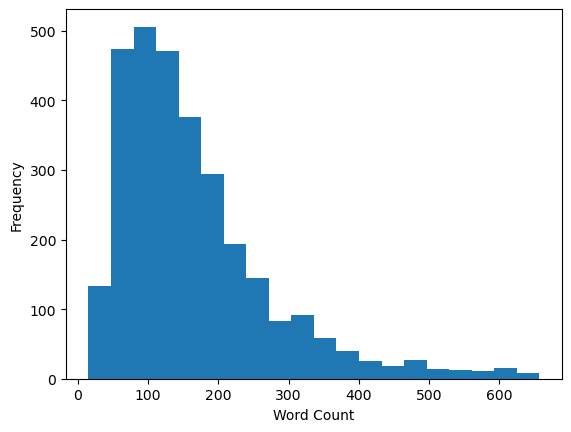

In [10]:
df['word_count'] = df['reviews'].apply(lambda x: len(x.split()))

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df['word_count'], bins=20)
plt.xlabel('Word Count')
plt.ylabel('Frequency')

In [11]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


C:\Users\yusuf\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yusuf\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

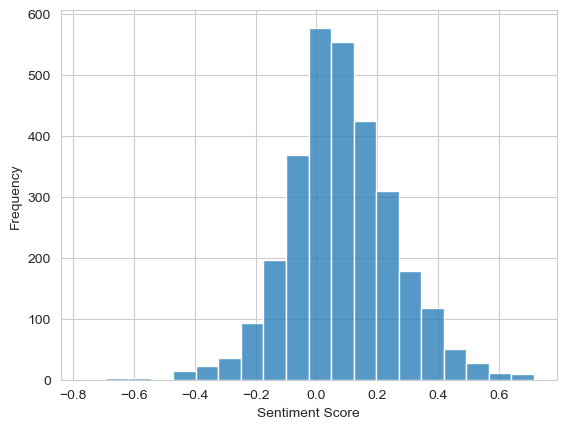

In [12]:
from textblob import TextBlob
import seaborn as sns
df['sentiment'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

sns.set_style("whitegrid")
sns.histplot(df['sentiment'], bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

In [13]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install pyLDAvis --user

Note: you may need to restart the kernel to use updated packages.


In [26]:
import numpy as np
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
from gensim import models, corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [14]:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [15]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

In [16]:
df['processed_text'] = df['reviews'].apply(preprocess_text)

In [17]:
id2word = corpora.Dictionary(df['processed_text'])

corpus = [id2word.doc2bow(text) for text in df['processed_text']]

In [18]:
num_topics = 5

lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=num_topics,
                     random_state=42,
                     passes=10,
                     alpha='auto')


In [24]:
top_n = 5 

topic_labels = []
for topic_id in range(num_topics):
    topic_terms = lda_model.get_topic_terms(topic_id, topn=top_n)
    topic_labels.append([id2word[term_id] for term_id, _ in topic_terms])

topic_labels_df = pd.DataFrame({'Topic': range(num_topics), 'Labels': topic_labels})

In [25]:
vis = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)

In [31]:
tokenized_reviews = [word_tokenize(review.lower()) for review in df]

def generate_ngrams(tokens, n):
    n_grams = trigrams(tokens, n)
    return [' '.join(gram) for gram in n_grams]

# Specify the value of n (bi-grams, tri-grams, etc.)
n = 2  # Change this to 3 for tri-grams, or any other desired value

# Generate n-grams for all reviews
all_ngrams = [generate_ngrams(tokens, n) for tokens in tokenized_reviews]

# Flatten the list of n-grams
flat_ngrams = [gram for ngram_list in all_ngrams for gram in ngram_list]

# Calculate the frequency of each n-gram
ngram_freq = Counter(flat_ngrams)

# Display the most common n-grams
most_common_ngrams = ngram_freq.most_common(10)  # Change 10 to the desired number of top n-grams

for ngram, freq in most_common_ngrams:
    print(f"{ngram}: {freq}")

# Visualize the top n-grams
top_ngrams, top_freqs = zip(*most_common_ngrams)

plt.figure(figsize=(10, 6))
plt.barh(top_ngrams, top_freqs)
plt.xlabel('Frequency')
plt.ylabel(f'Top {n}-grams')
plt.title(f'Top {n}-grams in Customer Reviews')
plt.gca().invert_yaxis() 

NameError: name 'trigrams' is not defined